## Lec21 Datasets analyzing using networkx

In [1]:
#datasets.py
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist('Datasets/FB/facebook_combined.txt')

print nx.info(G)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [3]:
print nx.number_of_nodes(G)
print nx.number_of_edges(G)
print nx.is_directed(G)

4039
88234
False


## PAJEK

In [6]:
G2 = nx.read_pajek("Datasets/football/football.net") #.net
print nx.info(G2)
print nx.number_of_nodes(G2)
print nx.number_of_edges(G2)
print nx.is_directed(G2)

Name: 
Type: MultiDiGraph
Number of nodes: 35
Number of edges: 118
Average in degree:   3.3714
Average out degree:   3.3714
35
118
True


In [12]:
G3 = nx.read_pajek("Datasets/karate/karate.paj") 
print nx.info(G3)
print nx.number_of_nodes(G3)
print nx.number_of_edges(G3)
print nx.is_directed(G3)

Name: 
Type: MultiGraph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882
34
78
False


In [11]:
G4 = nx.read_graphml("Datasets/wikipedia/wikipedia.graphml")
print nx.info(G4)
print nx.number_of_nodes(G4)
print nx.number_of_edges(G4)
print nx.is_directed(G4)

Name: 
Type: DiGraph
Number of nodes: 921
Number of edges: 1081
Average in degree:   1.1737
Average out degree:   1.1737
921
1081
True


Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 5
Average in degree:   1.2500
Average out degree:   1.2500
True


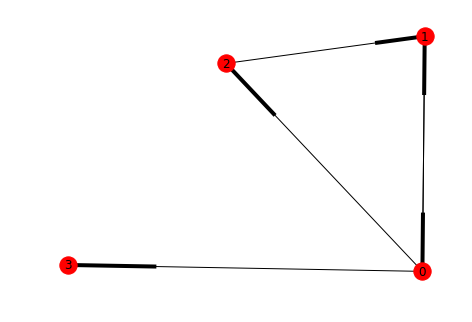

In [4]:
#G5 = nx.read_gexf("Datasets/GEXF/EuroSiS_Generale_Pays.gexf") #Tutors interpretor also throws error!
G5 = nx.read_gexf("Datasets/GEXF/data.gexf")
print nx.info(G5)
print nx.is_directed(G5)
nx.draw(G5,with_labels=1)
plt.show()


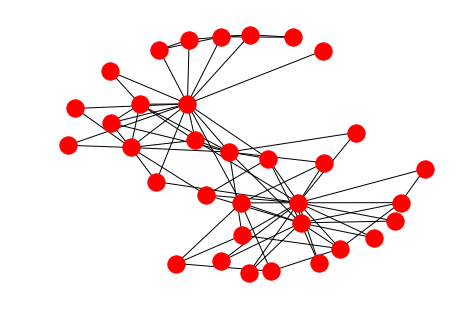

In [5]:
G6 = nx.read_gml('Datasets/karate/karate.gml')
nx.draw(G6)
plt.show()

Name: 
Type: MultiDiGraph
Number of nodes: 35
Number of edges: 118
Average in degree:   3.3714
Average out degree:   3.3714


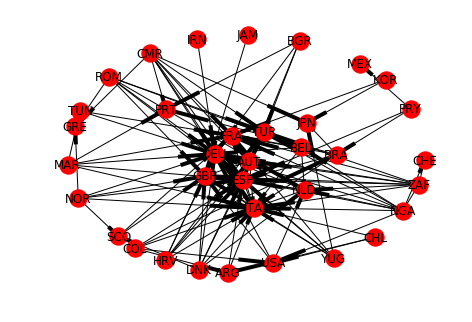

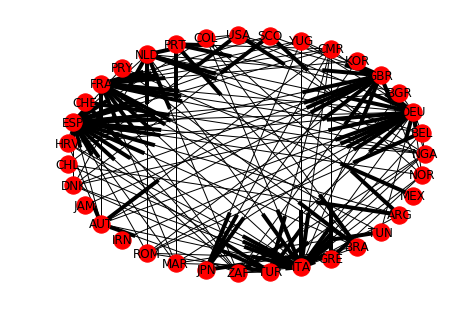

In [7]:
print nx.info(G2)#football.net
nx.draw(G2, with_labels=1)
plt.show()
nx.draw_circular(G2, with_labels=1)
plt.show()

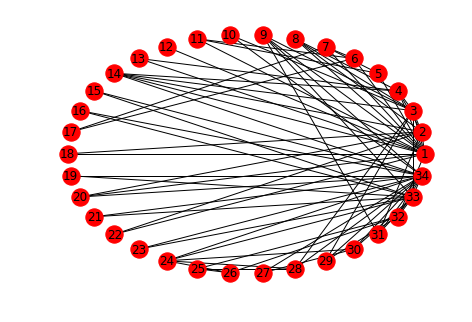

{1: 16, 2: 9, 3: 10, 4: 6, 5: 3, 6: 4, 7: 4, 8: 4, 9: 5, 10: 2, 11: 3, 12: 1, 13: 2, 14: 5, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 5, 25: 3, 26: 3, 27: 2, 28: 4, 29: 3, 30: 4, 31: 4, 32: 6, 33: 12, 34: 17}
[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Degree List :  [1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17]


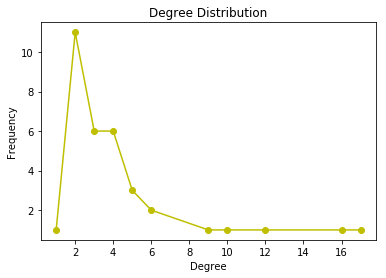

In [19]:
#Analysis of karate.gml G6
nx.draw_circular(G6, with_labels=1)
plt.show()
# Degree Distribution (degree and no. of nodes)
print nx.degree(G6)
all_degree_list = nx.degree(G6).values()
print all_degree_list

def degree_distribution(G6):
    #finding unique factors
    degree_count = []
    deg_set = set(nx.degree(G6).values())
    unique_deg_list = list(deg_set)
    print "Degree List : ", unique_deg_list
    for i in unique_deg_list:
        x = all_degree_list.count(i)
        degree_count.append(x)
    plt.plot(unique_deg_list, degree_count, 'yo-')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()
    return
degree_distribution(G6) #Implies it follows power law degree distributiom
# power law - Only few nodes have higher degrees

Degree List :  [1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17]
unique degree list :  [1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17]
degree count :  [1, 11, 6, 6, 3, 2, 1, 1, 1, 1, 1]


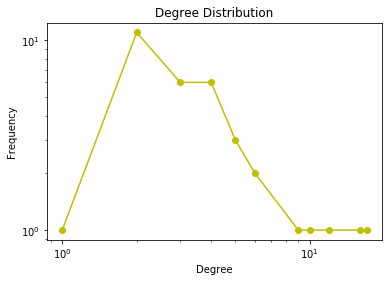

In [22]:
def degree_distribution(G):
    degree_count = []
    #finding unique factors
    deg_set = set(nx.degree(G6).values())
    unique_deg_list = list(deg_set)
    print "Degree List : ", unique_deg_list
    for i in unique_deg_list:
        x = all_degree_list.count(i)
        degree_count.append(x)
    print "unique degree list : ", unique_deg_list
    print "degree count : ", degree_count
    plt.loglog(unique_deg_list, degree_count, 'yo-')#plot between logx and logy
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()
    return
degree_distribution(G6)

## Density
 * density = number of edges present/Total edges possible
 * max edges = n (C) 2
 * simple graph -> density 0 to 1
 * null graph -> density = 0
 * complete graph -> density = 1
 * multi graph -> density >=0

In [24]:
G  = nx.complete_graph(100)
print nx.density(G)
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
print nx.density(G)

1.0
0.0


In [27]:
#density of karate
print nx.density(G6) #=> sparse graph

0.139037433155


In [28]:
print nx.clustering(G6)

{1: 0.15, 2: 0.3333333333333333, 3: 0.24444444444444444, 4: 0.6666666666666666, 5: 0.6666666666666666, 6: 0.5, 7: 0.5, 8: 1.0, 9: 0.5, 10: 0.0, 11: 0.6666666666666666, 12: 0.0, 13: 1.0, 14: 0.6, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 0.3333333333333333, 21: 1.0, 22: 1.0, 23: 1.0, 24: 0.4, 25: 0.3333333333333333, 26: 0.3333333333333333, 27: 1.0, 28: 0.16666666666666666, 29: 0.3333333333333333, 30: 0.6666666666666666, 31: 0.5, 32: 0.2, 33: 0.19696969696969696, 34: 0.11029411764705882}


In [30]:
for i in nx.clustering(G6).items():
    print i
print "Avg clustering : ", nx.average_clustering(G6)

(1, 0.15)
(2, 0.3333333333333333)
(3, 0.24444444444444444)
(4, 0.6666666666666666)
(5, 0.6666666666666666)
(6, 0.5)
(7, 0.5)
(8, 1.0)
(9, 0.5)
(10, 0.0)
(11, 0.6666666666666666)
(12, 0.0)
(13, 1.0)
(14, 0.6)
(15, 1.0)
(16, 1.0)
(17, 1.0)
(18, 1.0)
(19, 1.0)
(20, 0.3333333333333333)
(21, 1.0)
(22, 1.0)
(23, 1.0)
(24, 0.4)
(25, 0.3333333333333333)
(26, 0.3333333333333333)
(27, 1.0)
(28, 0.16666666666666666)
(29, 0.3333333333333333)
(30, 0.6666666666666666)
(31, 0.5)
(32, 0.2)
(33, 0.19696969696969696)
(34, 0.11029411764705882)
Avg clustering :  0.570638478208


In [32]:
print "Diameter is", nx.diameter(G6)

Diameter is 5
